<a href="https://colab.research.google.com/github/urielmun/AI_lab/blob/main/Cancer_Death_Rates_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
varunraskar_cancer_regression_path = kagglehub.dataset_download('varunraskar/cancer-regression')

print('Data source import complete.')


100%|██████████| 339k/339k [00:00<00:00, 37.6MB/s]

Extracting files...
Data source import complete.


# Cancer Regression Prediction Model.

The aim of this notebook is to develop a model that can predict the `death rates` due to cancer. You can get the data from [Kaggle](https://www.kaggle.com/datasets/varunraskar/cancer-regression/data).


# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.pipeline  import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, RFECV, f_regression

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from sklearn.metrics import mean_squared_error

# show all columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# set the default for the plot
sns.set_style('whitegrid')
sns.set_palette('colorblind')

import warnings
warnings.filterwarnings('ignore')

In [4]:
path = kagglehub.dataset_download("varunraskar/cancer-regression")

print("Path to dataset files:", path)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Using Colab cache for faster access to the 'cancer-regression' dataset.
Path to dataset files: /kaggle/input/cancer-regression
/kaggle/input/cancer-regression/cancer_reg.csv
/kaggle/input/cancer-regression/avg_household_size_column.ipynb
/kaggle/input/cancer-regression/avg-household-size.csv


# 2. Import the dataset(s)

In [5]:
cancer = pd.read_csv('/kaggle/input/cancer-regression/cancer_reg.csv')
cancer.head()



,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [6]:
demographics = pd.read_csv('/kaggle/input/cancer-regression/avg-household-size.csv')
demographics.head()

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [7]:
cancer.shape , demographics.shape

((3047, 33), (3220, 4))

The number of rows for the two datasets are inconsistent. For the purpose of this notebook, please allow me to ignore the *demographics dataset* and focus solely on the *cancer regression* dataset.

In [ ]:
cancer.info()

It's obvious that some of these columns have missing data. For the `pctsomecol18_24` column, it has only **762** non-null values, thus I will drop it from the dataset. For the rest of the columns, I will simply use the median value to replace missing values.

There are two *categorical columns*, `geography` and `binnedinc` columns. The rest are numerical.

In [8]:
cancer.isnull().sum()

,0
avganncount,0
avgdeathsperyear,0
target_deathrate,0
incidencerate,0
medincome,0
popest2015,0
povertypercent,0
studypercap,0
binnedinc,0
medianage,0


In [9]:
# check for duplicates
cancer.duplicated().sum()

np.int64(0)

The dataset has no duplicates.

In [10]:
cancer.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
avganncount,3047.0,NaN,NaN,NaN,606.338544,1416.356223,6.0,76.0,171.0,518.0,38150.0
avgdeathsperyear,3047.0,NaN,NaN,NaN,185.965868,504.134286,3.0,28.0,61.0,149.0,14010.0
target_deathrate,3047.0,NaN,NaN,NaN,178.664063,27.751511,59.7,161.2,178.1,195.2,362.8
incidencerate,3047.0,NaN,NaN,NaN,448.268586,54.560733,201.3,420.3,453.549422,480.85,1206.9
medincome,3047.0,NaN,NaN,NaN,47063.281917,12040.090836,22640.0,38882.5,45207.0,52492.0,125635.0
popest2015,3047.0,NaN,NaN,NaN,102637.370528,329059.220504,827.0,11684.0,26643.0,68671.0,10170292.0
povertypercent,3047.0,NaN,NaN,NaN,16.878175,6.409087,3.2,12.15,15.9,20.4,47.4
studypercap,3047.0,NaN,NaN,NaN,155.399415,529.628366,0.0,0.0,0.0,83.650776,9762.308998
binnedinc,3047,10,"(45201, 48021.6]",306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medianage,3047.0,NaN,NaN,NaN,45.272333,45.30448,22.3,37.7,41.0,44.0,624.0


All the entries in the `geography` dataset are unique, thus I will drop this column.

Some of the numerical columns seem to have outliers. This will be handled in the data cleaning part.

# Exploratory Data analysis.

## (i) Numerical columns

array([[<Axes: title={'center': 'avganncount'}>,
        <Axes: title={'center': 'avgdeathsperyear'}>,
        <Axes: title={'center': 'target_deathrate'}>,
        <Axes: title={'center': 'incidencerate'}>,
        <Axes: title={'center': 'medincome'}>,
        <Axes: title={'center': 'popest2015'}>],
       [<Axes: title={'center': 'povertypercent'}>,
        <Axes: title={'center': 'studypercap'}>,
        <Axes: title={'center': 'medianage'}>,
        <Axes: title={'center': 'medianagemale'}>,
        <Axes: title={'center': 'medianagefemale'}>,
        <Axes: title={'center': 'percentmarried'}>],
       [<Axes: title={'center': 'pctnohs18_24'}>,
        <Axes: title={'center': 'pcths18_24'}>,
        <Axes: title={'center': 'pctsomecol18_24'}>,
        <Axes: title={'center': 'pctbachdeg18_24'}>,
        <Axes: title={'center': 'pcths25_over'}>,
        <Axes: title={'center': 'pctbachdeg25_over'}>],
       [<Axes: title={'center': 'pctemployed16_over'}>,
        <Axes: title={'ce

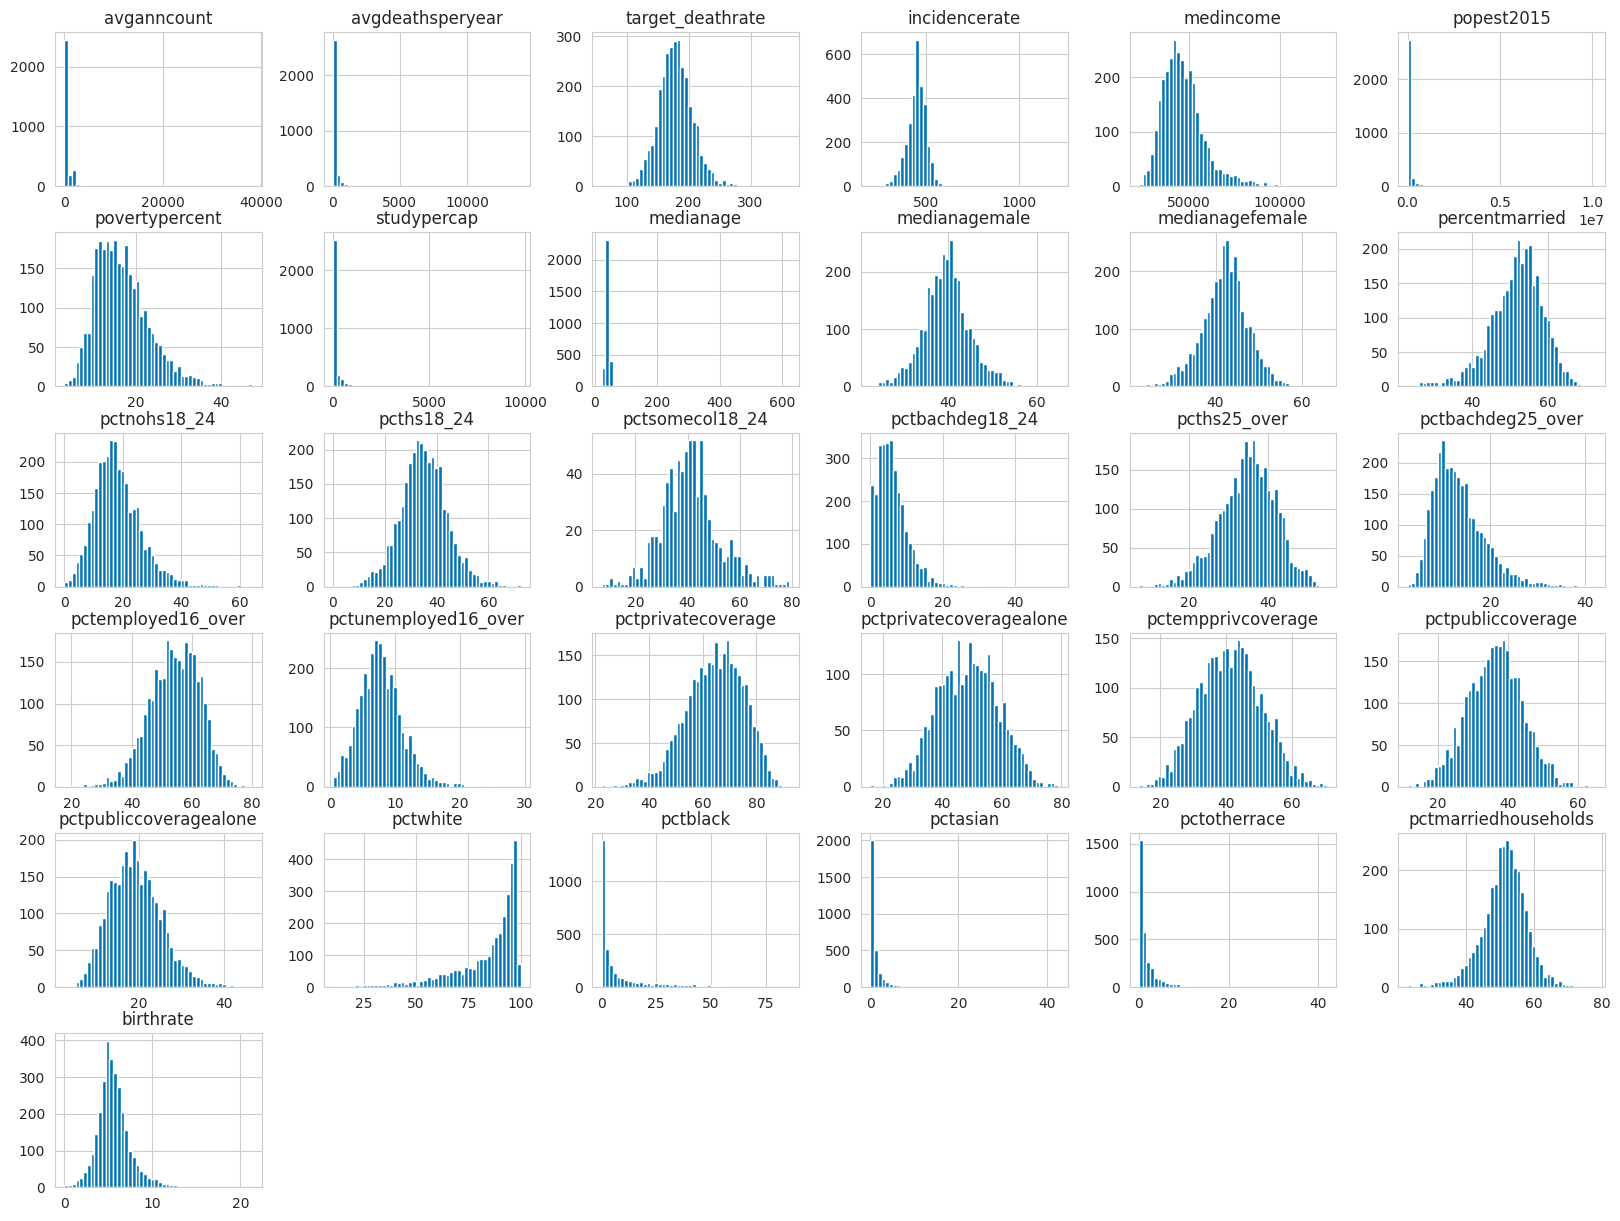

In [11]:
# histograms of the numerical columns
cancer.hist(figsize=(20, 15), bins=50)

I noted the following from the visualization above:
1. The following columns seem to have extreme outliers (`avganncount, avgdeathsperyear, popest2015, studypercap, medianage,pctblack, pctasian, pctotherrace`)
2. Use of different scales - call need for standardizing the data.

avganncount: Average number of cancer cases diagnosed annually.

avgdeathsperyear: Average number of deaths due to cancer per year.

popest2015: Estimated population in 2015.

studypercap: Per capita number of cancer-related clinical trials conducted.

pctblack: Percentage of Black population.

pctasian: Percentage of Asian population.

pctotherrace: Percentage of population belonging to other races.


I will only handle the outliers in `medainage` column for a start.

<Axes: ylabel='medianage'>

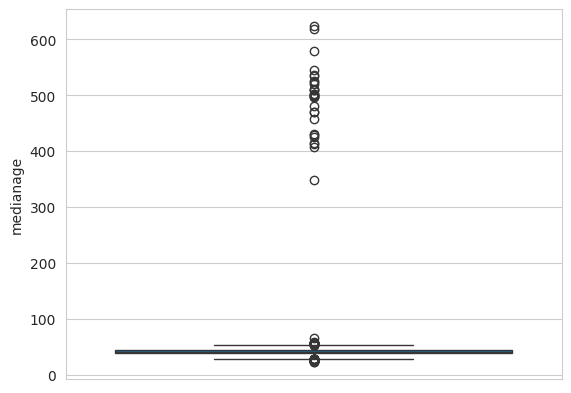

In [12]:
# show the boxplot for the median age column
sns.boxplot(cancer['medianage'])

In [ ]:
# show the rows whose median age is greater than 100
print(len(cancer[cancer['medianage'] > 100]))

In [ ]:
# investigating outliers in the rest of the noted columns
columns = ['avganncount', 'avgdeathsperyear','popest2015','studypercap']

fig, axes = plt.subplots(nrows=2, ncols =2, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(cancer[col], color='g', ax=axes[i])
    axes[i].set_title(f'{col} boxplot')
    axes[i].set_xlabel('')


The following values will be used as the maximum values in an effort to handle the outliers:
* `medianage`: 100
* `avganncount`: 15000
* `avgdeathsperyear`: 6000
* `popest20151`: 4,000,000.

Values above the specified caps will be dropped.


## (ii) Target column

In [ ]:
print(f"MAXIMUM VALUE {cancer['target_deathrate'].max()}, MINIMUM VALUE {cancer['target_deathrate'].min()}, MEAN {cancer['target_deathrate'].mean()}")
sns.histplot(cancer['target_deathrate'], bins=50, kde=True)

In [ ]:
sns.boxplot(cancer['target_deathrate'])

## (iii) Categorical Column(s)

In [ ]:
cancer['binnedinc'].value_counts()

The numerical values will be extracted and the mean calculated. This will convert the data into a numerical column too. The values also seem to be intentional and not random, given the almost balanced value count for each unique category.


In [ ]:
sns.boxplot(data=cancer, x='binnedinc', y='target_deathrate', palette='Set2')
plt.xticks(rotation =  45, horizontalalignment='right')

## (iv) Multi-variate relationships

In [ ]:
# check for correlation
visuals_data = cancer.copy()
# numerical columns only
visuals_data = visuals_data.select_dtypes(include='number')

corr_matrix = visuals_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')


# 3. Splitting the data into train and test splits

To ensure that the test data is representative of the train data, I shall use the `StratifiedShuffleSplit`



deathrate_category
medium    2425
high       614
low          8
Name: count, dtype: int64


<Axes: xlabel='deathrate_category'>

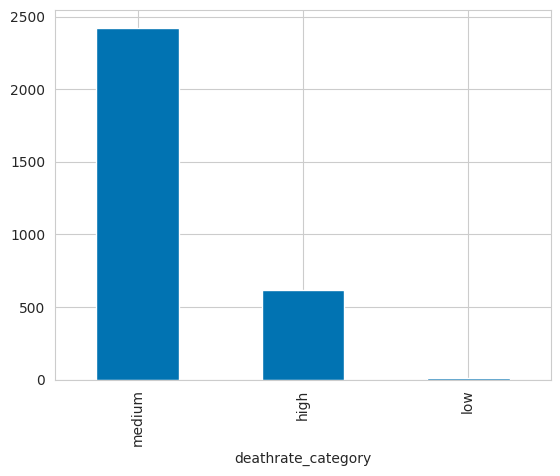

In [13]:
cancer['deathrate_category'] = pd.cut(cancer['target_deathrate'], bins=[0, 100, 200, np.inf], labels = ['low', 'medium', 'high'])
print(cancer['deathrate_category'].value_counts())
cancer['deathrate_category'].value_counts().plot(kind='bar')

In [14]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state=42)

for train_index, test_index in split.split(cancer, cancer['deathrate_category']):
    train_set = cancer.loc[train_index]
    test_set = cancer.loc[test_index]

train_set.drop('deathrate_category', axis=1, inplace=True)
test_set.drop('deathrate_category', axis=1, inplace=True)
cancer.drop('deathrate_category', axis=1, inplace=True)

# 4. Data Cleaning

In [15]:

def clean_data(data):
    '''
    This function performs the following operations on the dataset provides:
    1. Drops the 'geography and pctsomecol18_24' columns
    2. Handles outliers by replacing rows with median age greater than 100, avganncount > 15000, avgdeathsperyear > 6000, popest2015 > 4,000,000 and studypercap > 6000 with the mean of the respective columns
    3. Replaces missing values with the median of the respective columns
    4. Extracts the numerical values in 'binnedinc' column and replaces it with the median value
    5. Standardizes the numerical columns
    5. Returns the cleaned dataset

    '''

    data.drop(['geography', 'pctsomecol18_24'], axis=1, inplace=True)

    # replace outliers with the median of the respective columns
    data['medianage'] = data['medianage'].apply(lambda x: data['medianage'].median() if x > 100 else x)
    data['avganncount'] = data['avganncount'].apply(lambda x: data['avganncount'].median() if x > 15000 else x)
    data['avgdeathsperyear'] = data['avgdeathsperyear'].apply(lambda x: data['avgdeathsperyear'].median() if x > 6000 else x)
    data['popest2015'] = data['popest2015'].apply(lambda x: data['popest2015'].median() if x > 4000000 else x)
    data['studypercap'] = data['studypercap'].apply(lambda x: data['studypercap'].median() if x > 6000 else x)


    # function to extract the numerical values in the 'binnedinc' column
    def extract_num(x):
        try:
            lower, upper = map(float, x.strip('()[]').split(','))
            return (lower + upper) / 2
        except:
            return np.nan

    # modify the 'binnedinc' column
    data['binnedinc'] = data['binnedinc'].apply(extract_num)

    num_pipeline = Pipeline([
        ('impute', SimpleImputer(strategy = 'median')),
        ('standardize', StandardScaler())
    ])

    data_prepared = num_pipeline.fit_transform(data)
    data_prepared = pd.DataFrame(data_prepared, columns=data.columns)
    return data_prepared


In [16]:
X_train, y_train = train_set.drop('target_deathrate', axis=1), train_set['target_deathrate']
X_train_prepared = clean_data(X_train)
X_train_prepared.head()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,-0.356528,-0.258924,1.648856,-1.001881,-0.291903,1.107929,-0.328008,-0.769492,-0.121555,-0.112718,-0.153205,0.007110,-0.470397,-0.194615,-0.257364,0.947043,-1.015284,-1.120975,0.955267,-0.934982,-0.737315,-0.318233,0.711702,1.101865,0.878498,-0.569461,-0.425023,-0.543508,0.209386,-0.823755
1,1.205961,-0.241365,0.094213,0.521063,-0.256417,-0.746736,-0.328008,0.228005,0.051574,0.212678,-0.040631,-0.184764,-0.544324,-0.084114,-0.496259,0.230935,0.665837,0.554673,-0.715591,0.832175,0.030683,1.281537,-0.269273,-0.223578,0.365420,-0.539566,-0.260016,-0.519694,-0.002227,-0.256983
2,1.205961,-0.399394,0.094213,-0.132055,-0.376785,-0.558126,-0.328008,-0.135317,1.225007,0.825186,1.216442,0.907441,0.860280,-0.448767,-0.648284,-0.284663,-0.033056,0.808560,-0.275892,0.587781,-0.014494,-0.744839,0.401921,-0.534485,0.722616,-0.539111,-0.474823,-0.560042,0.146097,2.534725
3,-0.465844,-0.399394,0.539796,0.588972,-0.373697,-0.793889,-0.328008,0.228005,0.166994,0.078691,0.184516,1.527342,1.254555,-0.294066,0.394169,0.918399,-0.108612,0.567368,-0.715591,0.456184,0.324329,-0.030275,-0.204735,-0.485394,0.337862,-0.602012,-0.474823,0.628408,1.310361,0.110263
4,-0.337288,-0.253907,0.693931,-0.454037,-0.266771,-0.039449,-0.328008,-0.433023,0.186231,0.250959,0.090705,0.376098,-0.260939,0.313688,0.133556,0.832466,-1.053062,-0.930561,0.574194,0.211790,0.030683,0.289680,0.027601,-0.059943,-0.394919,0.189716,-0.434305,-0.547339,0.173090,-0.428008


# 5. Machine Learning

## (i) Selecting and training a model.

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

for name, model in models.items():
    model.fit(X_train_prepared, y_train)
    predictions = model.predict(X_train_prepared)
    RMSE = np.sqrt(mean_squared_error(predictions, y_train))
    print(f"The RMSE of {name} is {RMSE:.2f}")

The RMSE of Linear Regression is 18.91
The RMSE of Decision Tree is 0.00
The RMSE of Random Forest is 6.98
The RMSE of AdaBoost Regressor is 18.67


## (ii) Cross Validation

In [18]:
def cross_validation(algorithm, X_train_prepared, y_train):
    scores = cross_val_score(algorithm, X_train_prepared, y_train, scoring='neg_mean_squared_error', cv=10)
    print(f"MEAN RMSE: {np.sqrt(-scores).mean()}")
    print(f"Standard deviation: {np.sqrt(-scores).std()}")


In [19]:
for name, model in models.items():
    print("#" * 100)
    print (name)
    print("#" * 100)
    cross_validation(model, X_train_prepared, y_train)

####################################################################################################
Linear Regression
####################################################################################################
MEAN RMSE: 19.34666282108613
Standard deviation: 0.9898633860193325
####################################################################################################
Decision Tree
####################################################################################################
MEAN RMSE: 26.936640085022553
Standard deviation: 1.8213266864578859
####################################################################################################
Random Forest
####################################################################################################
MEAN RMSE: 18.759118086368144
Standard deviation: 1.2726224404860107
####################################################################################################
AdaBoost Regressor
######################

Overfitting had initially occured.

Random Forest Classifier outperform the other algorithms.


# 6. Fine Tuning the model

In [ ]:
# hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'max_features': [10, 20, 30]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv = 5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train_prepared, y_train)


In [ ]:
grid_search.best_params_

In [ ]:
sorted(zip(grid_search.best_estimator_.feature_importances_, X_train.columns), reverse=True)

In [ ]:
model = grid_search.best_estimator_

# 7. Feature Selection

## (i) Feature selection using SelectKBest

In [ ]:
selector = SelectKBest(f_regression, k = 20)

X_new_kbest = selector.fit_transform(X_train_prepared, y_train)

selected_features = X_train_prepared.columns[selector.get_support()]

X_new_kbest = pd.DataFrame(X_new_kbest, columns = selected_features)
X_new_kbest.head()

In [ ]:
cross_validation(model, X_new_kbest, y_train)

No improvement was noted in the model. Instead, it overfitted again

## (ii) Feature Selection using Recursive Feature Elimination with Cross-Validation (RFECV)

In [ ]:
rfecv = RFECV(
    RandomForestRegressor(),
    step = 1,
    min_features_to_select = 1,
    cv = 5,
    scoring='neg_mean_squared_error',
    n_jobs = -1)

rfecv.fit(X_train_prepared, y_train)

In [ ]:
print("Optimal number of features: %d" % rfecv.n_features_)

In [ ]:
# Names of the features selected
selected_features = X_train_prepared.columns[rfecv.support_]
print(selected_features)

In [ ]:
print("RECURSIVE FEATURE ELIMINATION WITH CROSS VALIDATION")
X_new_rfecv = X_train_prepared[selected_features]

cross_validation(RandomForestRegressor(), X_new_rfecv, y_train)

A slight improvement is noted when using RFECV feature selection criteria.
# 8. Testing the model on the test dataset.

In [ ]:
X_test, y_test = test_set.drop('target_deathrate', axis = 1), test_set['target_deathrate']

X_test_prepared = clean_data(X_test)
X_test.head()

In [ ]:
cross_validation(model, X_test_prepared, y_test)

In [ ]:
test_data = X_test_prepared.iloc[[1]]
test_data

In [ ]:
prediction = model.predict(test_data)

print(f"The predicted value is {prediction}. The actual value is {y_test.iloc[1]}")